In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg

import matplotlib.pyplot as plt

from os.path import join
from scipy.stats import spearmanr, chi2_contingency

In [2]:
def jili_sidak_mc(data, alpha):
    '''
    Accepts a dataframe (data, samples x features) and a type-i error rate (alpha, float), 
    then adjusts for the number of effective comparisons between variables
    in the dataframe based on the eigenvalues of their pairwise correlations.
    '''
    import math
    import numpy as np

    mc_corrmat = data.corr()
    mc_corrmat.fillna(0, inplace=True)
    eigvals, eigvecs = np.linalg.eig(mc_corrmat)

    M_eff = 0
    for eigval in eigvals:
        if abs(eigval) >= 0:
            if abs(eigval) >= 1:
                M_eff += 1
            else:
                M_eff += abs(eigval) - math.floor(abs(eigval))
        else:
            M_eff += 0
    print('\nFor {0} vars, number of effective comparisons: {1}\n'.format(mc_corrmat.shape[0], M_eff))

    #and now applying M_eff to the Sidak procedure
    sidak_p = 1 - (1 - alpha)**(1/M_eff)
    if sidak_p < 0.00001:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:2e} after corrections'.format(sidak_p))
    else:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:.6f} after corrections'.format(sidak_p))
    return sidak_p, M_eff

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_SAaxis//"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [4]:
sns.set(style='white', context='poster', palette='husl')

In [5]:
thk_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'age_thk_corrs.csv'),
    index_col=0, header=0
)
var_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'age_var_corrs.csv'),
    index_col=0, header=0
)
rni_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'age_rni_corrs.csv'),
    index_col=0, header=0
)
rnd_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'age_rnd_corrs.csv'),
    index_col=0, header=0
)

In [6]:
df = pd.read_pickle(join(PROJ_DIR, DATA_DIR, 'data_qcd.pkl'))

In [7]:
df = df.drop(df.filter(like='mri').columns, axis=1)

In [8]:
df[['pds_p_ss_female_category_2.baseline_year_1_arm_1',
    'pds_p_ss_male_category_2.baseline_year_1_arm_1']]
df['pds_p_ss_category_2.baseline_year_1_arm_1'] = df['pds_p_ss_female_category_2.baseline_year_1_arm_1'].fillna(0) + df['pds_p_ss_male_category_2.baseline_year_1_arm_1'].fillna(0)
df['pds_p_ss_category_2.baseline_year_1_arm_1'].replace({0:np.nan}, inplace=True)

In [9]:
df[['pds_p_ss_female_category_2.2_year_follow_up_y_arm_1',
    'pds_p_ss_male_category_2.2_year_follow_up_y_arm_1']]
df['pds_p_ss_category_2.2_year_follow_up_y_arm_1'] = df['pds_p_ss_female_category_2.2_year_follow_up_y_arm_1'].fillna(0) + df['pds_p_ss_male_category_2.2_year_follow_up_y_arm_1'].fillna(0)
df['pds_p_ss_category_2.2_year_follow_up_y_arm_1'].replace({0:np.nan}, inplace=True)

In [10]:
df['pds_p_ss_category_2.2_year_follow_up_y_arm_1']

subjectkey
NDAR_INV07HGA3B7    4.0
NDAR_INV07RAHHYH    NaN
NDAR_INV08P1JKNE    1.0
NDAR_INV09AUXBBT    1.0
NDAR_INV09ZE6UUK    2.0
                   ... 
NDAR_INVXXHGW734    3.0
NDAR_INVZKJXBJMM    2.0
NDAR_INVZKT1BV8Y    2.0
NDAR_INVVKPJ803Y    4.0
NDAR_INVVLHZP6FR    3.0
Name: pds_p_ss_category_2.2_year_follow_up_y_arm_1, Length: 7457, dtype: float64

In [76]:
chi2_vars = [
    'pds_p_ss_female_category_2.baseline_year_1_arm_1',
    'pds_p_ss_male_category_2.baseline_year_1_arm_1',
    'pds_p_ss_category_2.baseline_year_1_arm_1',
    'race_ethnicity.baseline_year_1_arm_1', 
    'sex.baseline_year_1_arm_1',
    'demo_prnt_ed_v2.baseline_year_1_arm_1',
    'pds_p_ss_male_category_2.2_year_follow_up_y_arm_1',
    'pds_p_ss_female_category_2.2_year_follow_up_y_arm_1',
    'pds_p_ss_category_2.2_year_follow_up_y_arm_1',
    'demo_comb_income_v2.baseline_year_1_arm_1'
]

var_names = [
    'Female puberty @ age 9-10',
    'Male puberty @ age 9-10',
    'Puberty @ age 9-10',
    'Race/ethnicity', 
    'Sex',
    'Caregiver education',
    'Male puberty @ age 11-13',
    'Female puberty @ age 11-13',
    'Puberty @ age 11-13',
    'Household income'
]

In [23]:
alpha, _ = jili_sidak_mc(df[chi2_vars], 0.05)


For 9 vars, number of effective comparisons: 7.236648627794781

Critical value of 0.050 becomes 0.007063 after corrections


/var/folders/t5/4bz0680d45n5_5m30ny85m540000gp/T/ipykernel_6577/942206915.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mc_corrmat = data.corr()


In [12]:
r_df = pd.concat(
    [
        thk_df['r'], 
        rni_df['r'], 
        rnd_df['r'], 
        var_df['r']
    ], axis=1
)
r_df.columns = ['thickness', 'isotropic diffusion', 'directional diffusion', 'functional variance']

p_df = pd.concat(
    [
        thk_df['p'], 
        rni_df['p'], 
        rnd_df['p'], 
        var_df['p']
    ], axis=1
)
p_df.columns = ['thickness', 'isotropic diffusion', 'directional diffusion', 'functional variance']


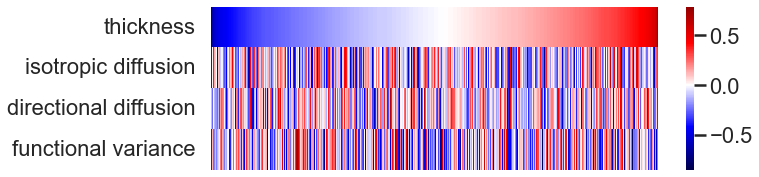

In [150]:
fig,ax = plt.subplots(figsize=(10,3))
sns.heatmap(r_df.dropna().sort_values('thickness').T, ax=ax, cmap='seismic', center=0)
ax.set_xticklabels('')
plt.show()

In [14]:
spearmanr(r_df.dropna()['functional variance'], r_df.dropna()['isotropic diffusion'])

SpearmanrResult(correlation=-0.0011751812517496124, pvalue=0.941126282066977)

Text(0.5, 1.0, 'Correlations with S-A Axis, per participant')

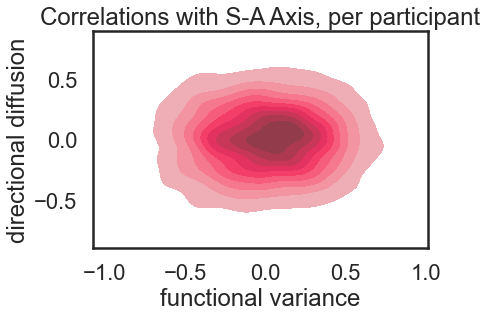

In [15]:
g = sns.kdeplot(r_df, x='functional variance', y='directional diffusion', fill=True
                   )
g.set_title('Correlations with S-A Axis, per participant')

In [16]:
r_df[p_df['thickness'] < 0.01]['thickness'] 

NDAR_INV09AUXBBT   -0.319197
NDAR_INV021403LF   -0.530519
NDAR_INV0314RN9P   -0.411307
NDAR_INV0MCARYLD   -0.362980
NDAR_INV0MRY4Z3E   -0.700844
                      ...   
NDAR_INVYY0HHPV2   -0.451197
NDAR_INVZ1B2P1NH    0.361797
NDAR_INVXN6HMGK8   -0.462076
NDAR_INVXRHZDZE8   -0.469100
NDAR_INVVLHZP6FR   -0.414895
Name: thickness, Length: 1513, dtype: float64

In [147]:
# run chi-square tests for each brain measure and categorical variable
cols = pd.MultiIndex.from_product([r_df.columns, ['x2','p']])
chi2_res = pd.DataFrame(index=chi2_vars, columns=cols)
for meas in r_df.columns:
    pos_r = r_df[p_df[meas] < 0.01][meas] > 0
    pos_r = pos_r[pos_r == True]

    neg_r = r_df[p_df[meas] < 0.01][meas] < 0
    neg_r = neg_r[neg_r == True]
    
    neg_r = df.loc[neg_r.index]
    pos_r = df.loc[pos_r.index]
    
    for var in chi2_vars:
        contingency = pd.DataFrame()
        i = chi2_vars.index(var)
        for level in df[var].dropna().unique():
            if type(level) == np.float64 and level > 100:
                pass
            else:
                contingency.at['pos', level] = len(pos_r[pos_r[var] == level].index)
                contingency.at['neg', level] = len(neg_r[neg_r[var] == level].index)
        contingency = contingency[contingency.columns[contingency.sum() > 0]]
        ans = chi2_contingency(contingency)
        chi2 = ans[0]
        p = ans[1]
        chi2_res.at[var, (meas, 'x2')] = chi2
        chi2_res.at[var, (meas, 'p')] = p
        fig,ax = plt.subplots(figsize=(5,4), layout='constrained')
        temp_pos = pos_r[var].dropna()
        temp_pos.name = 'positive'
        temp_neg = neg_r[var].dropna()
        temp_neg.name = 'negative'
        sns.histplot(
            temp_pos, 
            ax=ax, 
            discrete=True, 
            stat='count', 
            legend=True, 
            color='#f73952', 
            alpha=0.5
        )
        sns.histplot(
            temp_neg, 
            ax=ax, 
            discrete=True, 
            stat='count', 
            legend=True, 
            color='#3982f7',
            alpha=0.5
        )
        ax.set_xlabel(var_names[i])
        if type(temp_pos.iloc[0]) == str:
            pass
        elif var == 'demo_comb_income_v2.baseline_year_1_arm_1':
            ax.set_xlim(left=0, right=10.5)
        else:
            ax.set_xlim(left=0, right=min(max(temp_neg.max(), temp_pos.max()), 21))
        if p < alpha:
            fig.savefig(f'../figures/{meas}_{var}_+v-_{np.round(p,4)}.png', dpi=600, bbox_inches='tight')
        else:
            fig.savefig(f'../figures/{meas}_{var}_+v-_ns.png', dpi=600, bbox_inches='tight')
        plt.close()

In [146]:
chi2_res.swaplevel(axis=1)['p'] < alpha

,thickness,isotropic diffusion,directional diffusion,functional variance
pds_p_ss_female_category_2.baseline_year_1_arm_1,False,False,False,False
pds_p_ss_male_category_2.baseline_year_1_arm_1,False,False,False,False
pds_p_ss_category_2.baseline_year_1_arm_1,True,False,False,False
race_ethnicity.baseline_year_1_arm_1,False,False,False,False
sex.baseline_year_1_arm_1,False,False,False,False
demo_prnt_ed_v2.baseline_year_1_arm_1,False,False,False,False
pds_p_ss_male_category_2.2_year_follow_up_y_arm_1,False,False,False,True
pds_p_ss_female_category_2.2_year_follow_up_y_arm_1,True,True,False,False
pds_p_ss_category_2.2_year_follow_up_y_arm_1,True,True,False,True
demo_comb_income_v2.baseline_year_1_arm_1,False,False,False,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:>

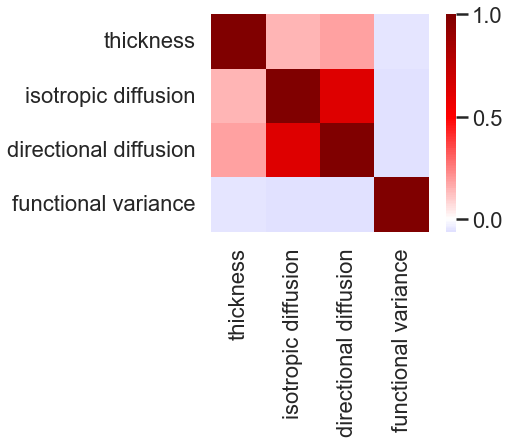

In [155]:
sns.heatmap(r_df[p_df['thickness'] < 0.01].corr(), cmap='seismic', square=True, center=0)

In [152]:
r_df[p_df['thickness'] < 0.01].corr().round(3)

,thickness,isotropic diffusion,directional diffusion,functional variance
thickness,1.000,0.15,0.181,-0.049
isotropic diffusion,0.150,1.00,0.630,-0.060
directional diffusion,0.181,0.63,1.000,-0.055
functional variance,-0.049,-0.06,-0.055,1.000


In [159]:
for meas in r_df.columns:
    temp = r_df[meas].dropna()
    print(meas, 'age:\t', spearmanr(temp, df.loc[temp.index]['interview_age.baseline_year_1_arm_1']))

thickness age:	 SpearmanrResult(correlation=-0.0035655048790584716, pvalue=0.7636432014535235)
isotropic diffusion age:	 SpearmanrResult(correlation=-0.010436773314094951, pvalue=0.4093961125468051)
directional diffusion age:	 SpearmanrResult(correlation=-0.012571700637059606, pvalue=0.32035887496858706)
functional variance age:	 SpearmanrResult(correlation=0.0059686499023257, pvalue=0.7013420321400243)


In [160]:
for meas in r_df.columns:
    temp = r_df[p_df[meas] < 0.01][meas].dropna()
    print(meas, 'age:\t', spearmanr(temp, df.loc[temp.index]['interview_age.baseline_year_1_arm_1']))

thickness age:	 SpearmanrResult(correlation=-0.017092426687254882, pvalue=0.5064674142349388)
isotropic diffusion age:	 SpearmanrResult(correlation=-0.002692737588195719, pvalue=0.910426511111963)
directional diffusion age:	 SpearmanrResult(correlation=0.004656860795835317, pvalue=0.8575556639825025)
functional variance age:	 SpearmanrResult(correlation=-0.01977328943530453, pvalue=0.47255170379646516)
